# Explaining Models with Shap

## Joseph LIm

## Loading in Data and Libraries

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib
import shap

In [2]:
loaded_joblib = joblib.load('dec_tree.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTree'])

In [3]:
X_train = loaded_joblib["X_train"]
X_test = loaded_joblib["X_test"]
y_train = loaded_joblib["y_train"]
y_test = loaded_joblib["y_test"]

preprocessor = loaded_joblib["preprocessor"]
LinearRegression = loaded_joblib["LinearRegression"]
DecisionTree = loaded_joblib["DecisionTree"]

## Explaining Tree Based model with Shap

In [4]:
X_shap = shap.sample(X_train,nsamples=400,random_state=321)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3888,15.85,0.110653,36.9506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2497,15.10,0.087407,221.8456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7723,17.50,0.015592,184.8266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8117,10.80,0.049820,243.2144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7475,15.00,0.044999,140.4838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [5]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
292     1379.5376
3035    2956.1520
6832    1259.6936
8455    4206.5244
7795     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [6]:
#Creating model explainer
explainer = shap.Explainer(DecisionTree)
explainer

In [7]:
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(400, 1593)

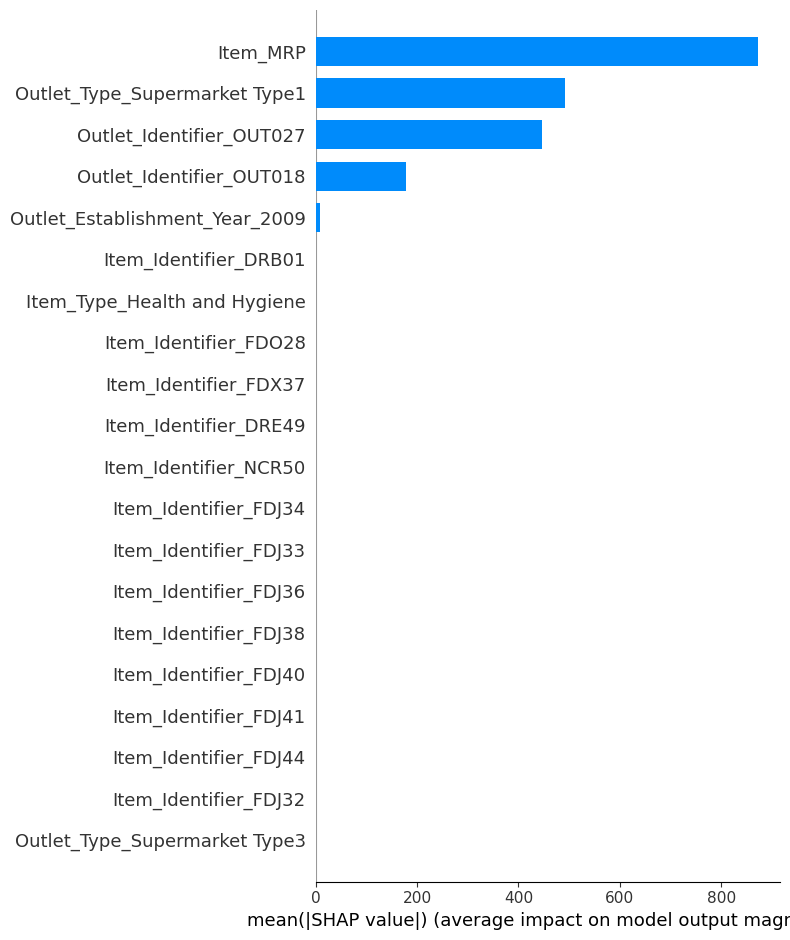

In [8]:
fig, ax = plt.subplots(figsize = (20, 20))
shap.summary_plot(shap_values, X_shap, plot_type = "bar")
ax.set_title('Summary Plot - Item Sales');
fig.savefig('summary_plot_1.png')

![image here]("DecTree5MIF.png")

According to the SHAP and the feature importance image, all of the most important features are the same.

In [9]:
#Saving Figure
plt.savefig("SHAPSummaryBar.png")

<Figure size 640x480 with 0 Axes>

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


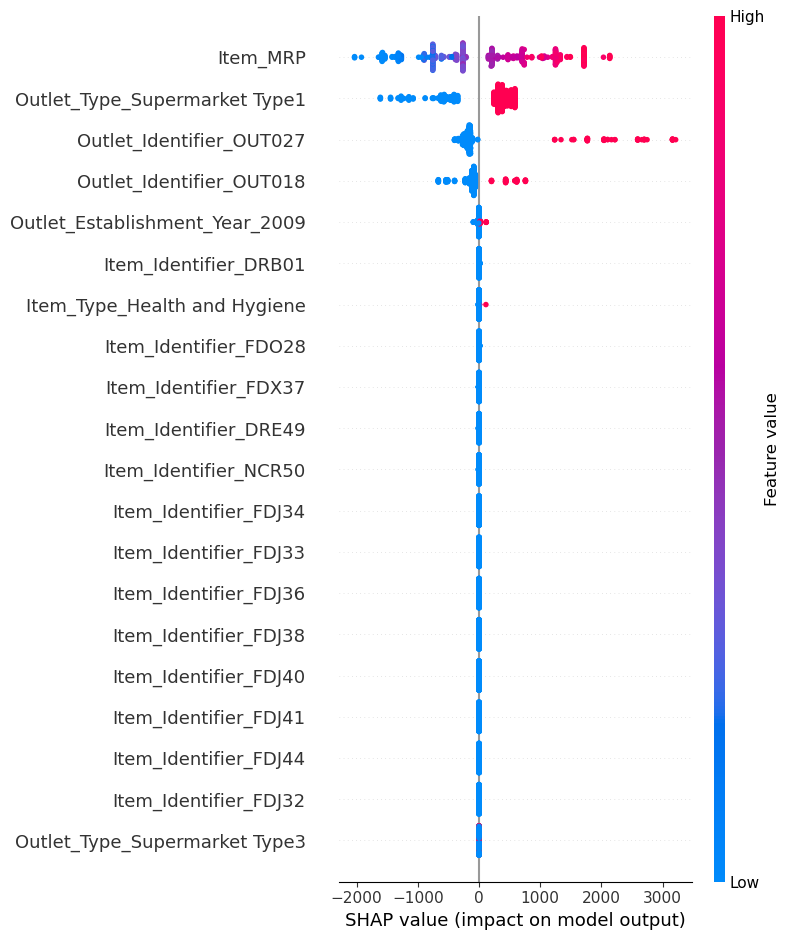

In [10]:
fig, ax = plt.subplots(figsize = (20, 20))
shap.summary_plot(shap_values, X_shap, plot_type = "dot")
ax.set_title('Summary Plot - Item Sales');
fig.savefig('SHAPSummaryDot.png')

THe 3 most important features and how they impact the model's predictions are as follows:
1. Item MRP, which seems to have a positive impact on the model's predictions
2. Whether the item came from a supermarket outlet, which also has a positive impact on the model's predictions
3. Whether the item came from a specific outlet, which also has a positive impact on the model's predictions.